The present Jupyter notebook for Data Science Process is based on the CRISP-DM:
 - Business Understanding 
 - Data Understanding
 - Prepare Data
 - Data Modeling
 - Evaluate the Results

In [3]:
# Necessary libraries 
import numpy as np # Do not forget to install it first in a normal terminal CMD and with the command pip install numpy
import pandas as pd # Do not forget to install it first in a normal terminal CMD and with the command pip install panda
import matplotlib.pyplot as plt # Do not forget to install it first in a normal terminal CMD and with the command pip install matplotlib
from sklearn.linear_model import LinearRegression # Do not forget to install it first in a normal terminal CMD and with the command 
# pip install scikit-learn
# probably is going to ask you for an update of python and the pip. Do it and change it from sklearn for scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [4]:
# Before starting we need to upload all the information from our data sets! 

# Boston Air Bnb
# Upload all the info (with this command do not forget that you should not have any space in the name of the directory, otherwise 
# you are going to have some problems. )
dfBCal = pd.read_csv('C:/Users/calla/Desktop/ECD/UDACITY/Nano_Degree_Data_Science/BostonAirbnbOpenData/calendar.csv')
# Calendar (columns 4, entries 0 to 1308889)
# listing_id(int64)   date(object)   available(object)   price(object)
dfBList = pd.read_csv('C:/Users/calla/Desktop/ECD/UDACITY/Nano_Degree_Data_Science/BostonAirbnbOpenData/listings.csv')
# List (columns 95, entries 0 to 3584 )
# id(int64)   listing_url(object) .... reviews_per_month(float64)
dfBRev = pd.read_csv('C:/Users/calla/Desktop/ECD/UDACITY/Nano_Degree_Data_Science/BostonAirbnbOpenData/reviews.csv')
# Review (columns 6, entries 0 to 68274)
# listing_id(int64)   id(int64)   date(object)   reviewer_id(int64)   reviewer_name(object)   comments(object)

# Business understanding (context)
All the task have to help us to understand if we want to enter to the renting business with the Airbnb platform.
We will follow the CRISP-DM method and develop just the necessary steps. You will find as well all the necessary codes to 
being able of analyse all the data from Boston Airbnb and of course the acknowledgments and detailes of each command. 
    
General commands that you should fine interesting to start looking your datasets. This helped us to understand the business! 
* Description of the dataframe `dfBCal.describe()`
* Principal information of the DF `dfBCal.info(0)`
* Header of the whole table of the DF `dfBCal.head()`

The goal for this project is to work with the actual data that we have, so it maybe important to press attention to what information
do we have, and most importantly how is going to be interpreted! Why? Because maybe it is going to be necessary to do some cleaning... 
press attention! We will write down some comments for you as well! 

In [6]:
dfBCal.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [7]:
dfBCal.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [8]:
dfBCal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [9]:
dfBList.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [10]:
dfBList.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [11]:
dfBRev.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


In [12]:
dfBRev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


Perfect! With all these data and the understanding of it, we can now develop our business questions: 

The goal is to analyse if it is interesting to get started or not in this business market, for this the proposed questions are:
* What is the information that the hosts do not usually put? 
* Where is the location (zip code) with higher prices? 
* Is it interesting to enter to the business of renting houses?

Following this code you will find these questions in a way of organizing the code for a better understanding. 

Remember as we talked before! Clearly our data needs some cleaning for being able of replying to our questions, other wise we will 
interpret wrongly the findings! So lets start! 

-------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------
## What is the information that the hosts do not usually put? 

With this information you should be able of building a good and competitive business of renting houses 

-------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------

C:\Users\calla\AppData\Local\Temp\ipykernel_31696\654337041.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_plot = row_sums[0].sort_values(ascending=False)


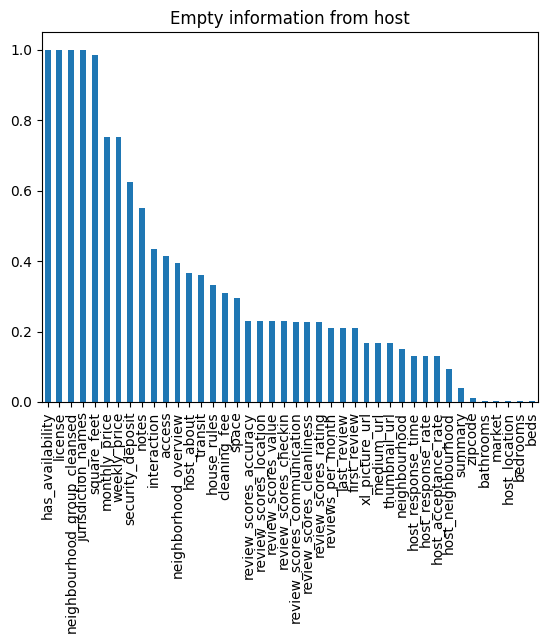

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Group the specific row and count NaN values and occurrences of 'none'
result = dfBList.groupby(dfBList.index).apply(lambda x: pd.Series({'NaN_Count': x.isna().sum(), 'None_Count': (x == 'none').sum()}))
# Sum all the values in each row
row_sums = result.sum(axis=0)
row_sums["NaN_Count"] = pd.to_numeric(row_sums["NaN_Count"], errors='coerce')
row_sums["None_Count"] = pd.to_numeric(row_sums["None_Count"], errors='coerce')

row_plot = row_sums[0].sort_values(ascending=False) # Ordering the column 
#print(row_sums_NaN[0].sort_values(ascending=False)) # Printing for visualize on text

(row_plot[:42]/dfBList.shape[0]).plot(kind="bar"); # Showing just until the row 42 
plt.title("Empty information from host"); # Print 

-------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------
# Where is the location (zip code) with higher prices? 
With this information you are able to see where it would be a better place to buy properties and renting them wiht higher prices 

-------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------

In [3]:
# Clean all the Host without zip code information 
# any guest would not choose because of security aspects
dfBList_zipcode = dfBList.dropna(subset=['zipcode'])

# Erase cells with more characters than the threshold of 5 that it is the normal for zip codes
# probably exist an mistake or it is fake 
threshold = 5
dfBList_zipcode.loc[dfBList_zipcode['zipcode'].str.len() > threshold, 'zipcode'] = ''
dfBList_zipcode = dfBList_zipcode[dfBList_zipcode['zipcode'] != '']

# Convert the column price from a object to int64
# Necessary for comparing and future graphics to compare and analyze
column_name = 'price'
dfBList_zipcode[column_name] = dfBList_zipcode[column_name].str.replace('$', '').str.replace(',', '')
dfBList_zipcode[column_name] = pd.to_numeric(dfBList_zipcode[column_name], errors='coerce')
dfBList_zipcode[column_name] = dfBList_zipcode[column_name].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
dfBList_zipcode[column_name] = dfBList_zipcode[column_name].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)
dfBList_zipcode[column_name] = dfBList_zipcode[column_name].apply(lambda x: float(x)/1000 if isinstance(x, str) and x.endswith(',') else x)

Text(0.5, 1.0, 'price')

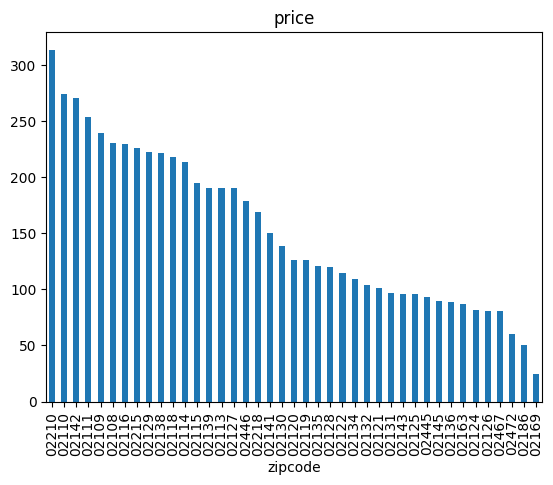

In [4]:
mean_price = dfBList_zipcode.groupby('zipcode')['price'].mean().sort_values(ascending=False)
#mean_price.head(90)
count_zipcode_price = mean_price.value_counts() #Provide a pandas series of the counts for each zip code
# The below should be a bar chart of the zip codes for the
# individuals in your count_vals if it is set up correctly.
mean_price.plot(kind="bar")
plt.title("price")
#mean_price.head()

In [5]:
print(mean_price.sort_values(ascending=False)) # Visualize the values in text 

zipcode
02210    313.440000
02110    274.076923
02142    270.000000
02111    253.535354
02109    238.941176
02108    230.361111
02116    229.180412
02215    225.546610
02129    221.844444
02138    221.500000
02118    217.789474
02114    213.238095
02115    195.065089
02139    190.166667
02113    190.158416
02127    189.938889
02446    178.500000
02218    169.000000
02141    150.000000
02130    138.746224
02120    126.173913
02119    126.110000
02135    120.395349
02128    119.684932
02122    114.409091
02134    108.836207
02132    103.783784
02121    101.310345
02131     96.907692
02143     95.571429
02125     95.527132
02445     92.800000
02145     89.833333
02136     88.793103
02163     86.666667
02124     81.200000
02126     80.958333
02467     80.400000
02472     60.000000
02186     50.000000
02169     25.000000
Name: price, dtype: float64


In [6]:
dfBList_zipcode['zipcode'].value_counts().sort_values(ascending=False) # Visualize the values in text 

zipcode
02116    388
02130    331
02118    247
02215    236
02134    232
02114    231
02127    180
02135    172
02115    169
02128    146
02125    129
02120    115
02113    101
02119    100
02111     99
02129     90
02124     80
02210     75
02108     72
02131     65
02109     51
02122     44
02132     37
02136     29
02121     29
02126     24
02110     13
02145     12
02446      8
02143      7
02139      6
02138      6
02467      5
02445      5
02163      3
02141      3
02218      1
02186      1
02169      1
02472      1
02142      1
Name: count, dtype: int64

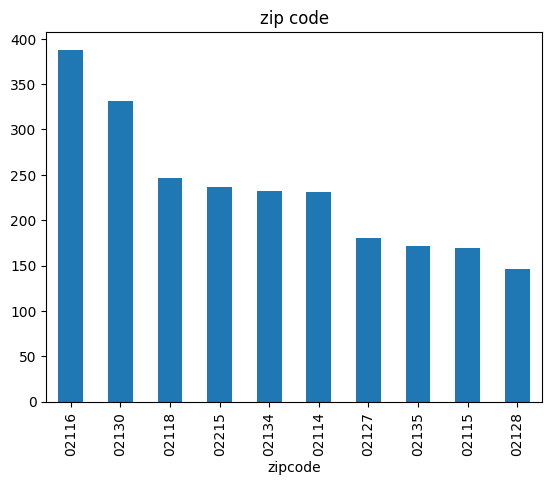

In [7]:
count_zipcodes = dfBList_zipcode["zipcode"].value_counts() #Provide a pandas series of the counts for each zip code 
# The below should be a bar chart of the proportion of the top 10 zip codes for the
# individuals in your count_vals if it is set up correctly.
#(count_zipcodes[:10]/dfBList_zipcode.shape[0]).plot(kind="bar");
count_zipcodes[:10].plot(kind="bar");
plt.title("zip code");

-------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------
# Is it interesting to enter to the business of renting houses? 
This will be based on how many optiones to rent are in the market considering that each id have different quantities of listing_id
and that the results can include from rooms to houses or hotels 

-------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------

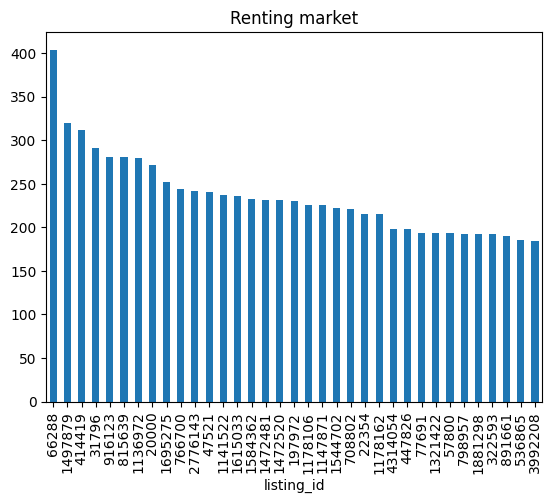

In [21]:
graph1 = dfBRev['listing_id'].value_counts().sort_values(ascending=False) # Preparing the data to plot 
#graph.info()
graph1[:35].plot(kind="bar"); # Ploting the count of values for listing_id 
plt.title("Renting market");

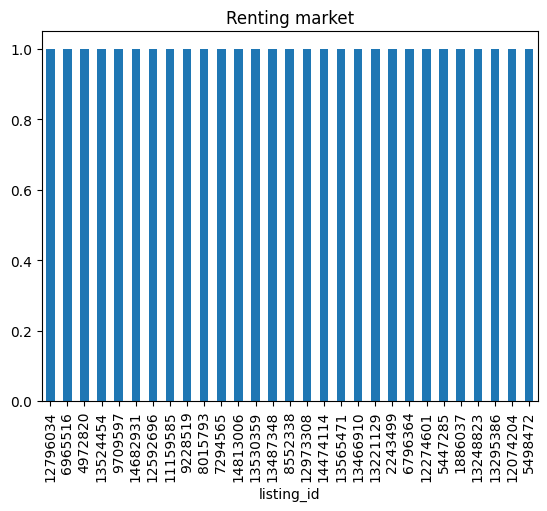

In [56]:
graph2 = dfBRev['listing_id'].value_counts().sort_values(ascending=False)
#graph.info()
graph2[2800:2829].plot(kind="bar"); # Final value 2829... 
plt.title("Renting market");